In [1]:
import numpy as np
import matplotlib.pyplot as plt
from exp_hh_model import HH_model_exp

In [46]:
params = {'p': 2, 'g_max': 120, 'E_rev': -60, 'a_m': 4, 'b_m': 5, 'delta_m': 0.5, 's_m': -20}
sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(0, 100, 11), 't': np.arange(0.0, 6.0, 0.01)}
model = HH_model_exp(params, sim_setup)

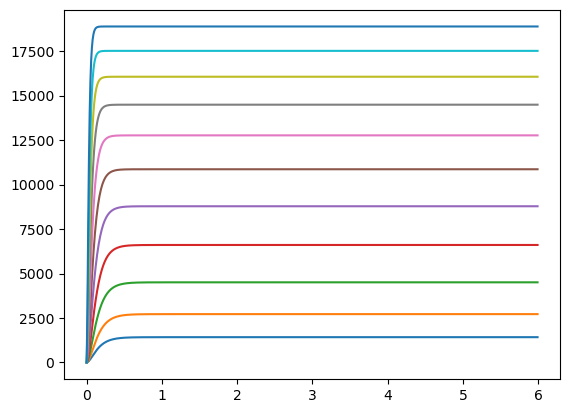

In [47]:
current_traces = model.simulation()
current_traces.shape

for step in range(len(sim_setup['step_Vs'])): 
    plt.plot(sim_setup['t'], current_traces[step])

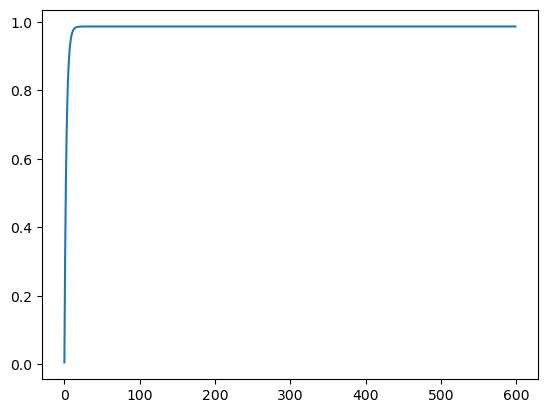

In [48]:
plt.plot(model.m(90))

Text(0.5, 1.0, 'Activation Steady State Curve')

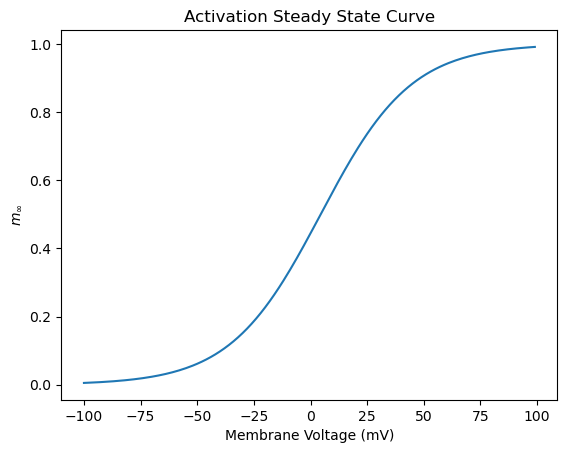

In [49]:
# get steady state curve/activation curve
m_infty_curve = np.array([model.m_infty(V) for V in range(-100, 100)])

plt.plot(range(-100, 100), m_infty_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$m_\infty$')
plt.title('Activation Steady State Curve')

Text(0.5, 1.0, 'Activation Time Constant Curve')

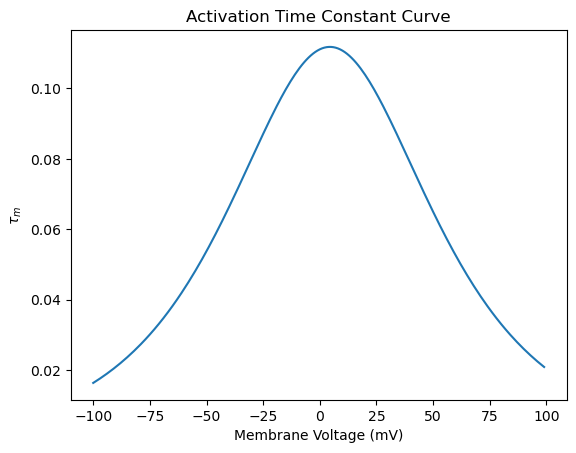

In [50]:
# get the time constant curve
time_constant_curve = np.array([model.tau_m(V) for V in range(-100, 100)])

plt.plot(range(-100, 100), time_constant_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$\u03C4_m$')
plt.title('Activation Time Constant Curve')

Text(0.5, 1.0, 'Opening and Closing Rate Curves')

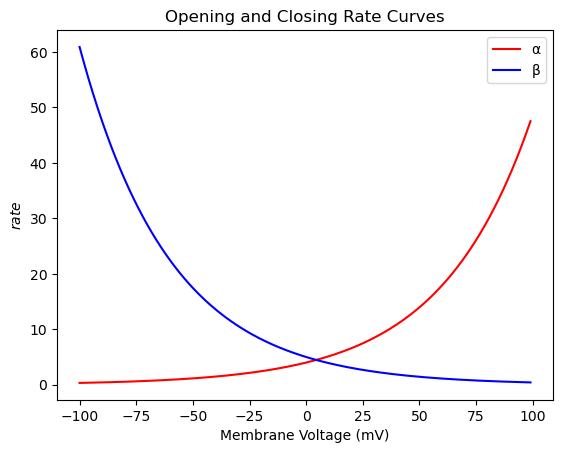

In [51]:
opening_rates = np.array([model.alpha(V) for V in range(-100, 100)]) 
closing_rates = np.array([model.beta(V) for V in range(-100, 100)]) 

plt.plot(range(-100, 100), opening_rates, color='red', label = '\u03B1')
plt.plot(range(-100, 100), closing_rates, color='blue', label = '\u03B2')

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$rate$')
plt.legend()
plt.title('Opening and Closing Rate Curves')

Here, we use the HH rate functions to infer some bounds on the V_2m, s_m, delta_m, a_m, b_m

In [32]:
# Hodgkin Huxley rate functions for the potassium currents in the squid giant axon. 
def hh_alpha(V): 
    return 0.1 * (25 - V) / (np.exp((25-V) / 10) - 1)

def hh_beta(V): 
    return 4 * np.exp(-V / 18)

def hh_m_infty(V): 
    return hh_alpha(V) / (hh_alpha(V) + hh_beta(V))

def hh_tau_m(V): 
    return 1 / (hh_alpha(V) + hh_beta(V))

def m(V): 
    hh_m_infty(V) + (hh_m_infty(model.prestep_V) - hh_m_infty(V)) * np.exp(- model.t / hh_tau_m(V))


/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_36460/1539302064.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return 0.1 * (25 - V) / (np.exp((25-V) / 10) - 1)


Text(0.5, 1.0, 'Activation Steady State Curve')

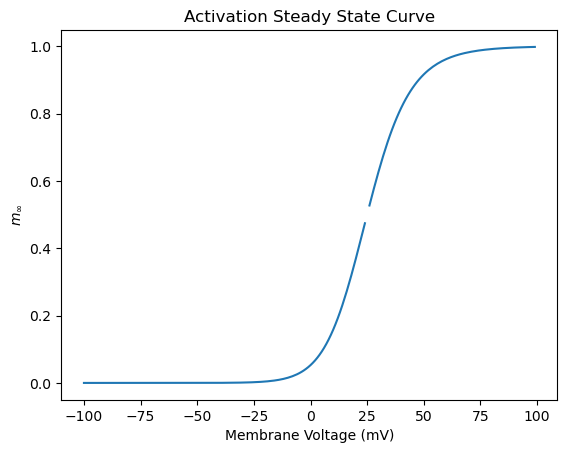

In [33]:
# get steady state curve/activation curve
m_infty_curve = np.array([hh_m_infty(V) for V in range(-100, 100)])

plt.plot(range(-100, 100), m_infty_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$m_\infty$')
plt.title('Activation Steady State Curve')

/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_36460/3989276616.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return 0.1 * (25 - V) / (np.exp((25-V) / 10) - 1)


Text(0.5, 1.0, 'Opening and Closing Rate Curves')

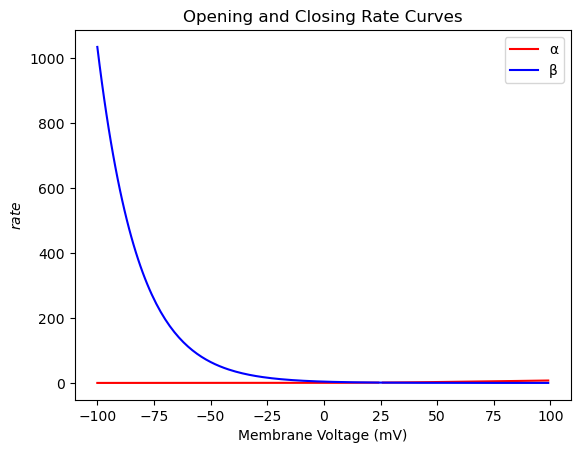

In [30]:
opening_rates = np.array([hh_alpha(V) for V in range(-100, 100)]) 
closing_rates = np.array([hh_beta(V) for V in range(-100, 100)]) 

plt.plot(range(-100, 100), opening_rates, color='red', label = '\u03B1')
plt.plot(range(-100, 100), closing_rates, color='blue', label = '\u03B2')

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$rate$')
plt.legend()
plt.title('Opening and Closing Rate Curves')